In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import  Flatten, Dense
import matplotlib.pyplot as plt
import cv2
from glob import glob

import random
from numpy.random import seed
seed(1)

ASL Alphabet for letter: S


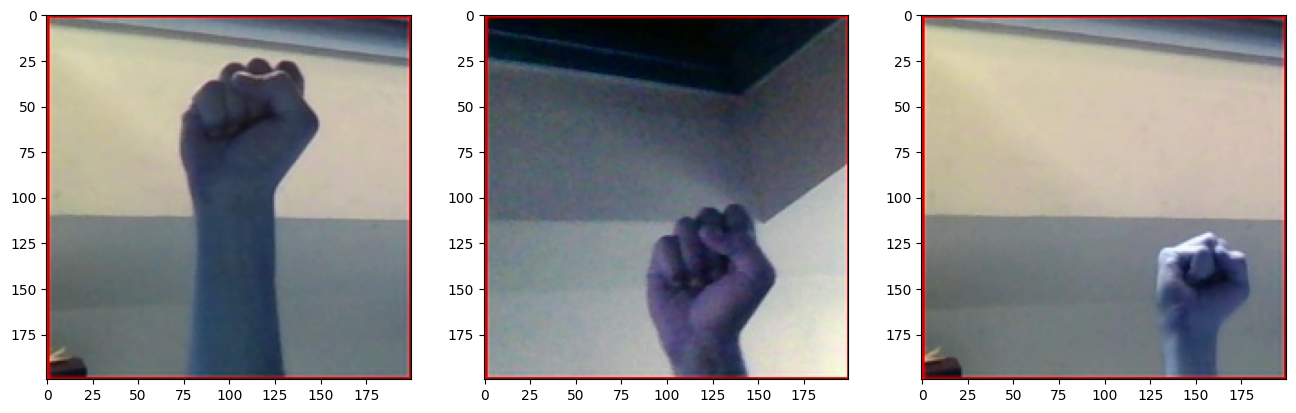

In [3]:
def plot_three_samples(letter):
    print("ASL Alphabet for letter: "+letter)
    base_path = '../asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents,3)
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(imgs[2]))
    
    return

plot_three_samples('S')

In [4]:
path = '../asl_alphabet_train/asl_alphabet_train'
path_test = '../asl_alphabet_test/asl_alphabet_test'
target_size = (64,64)
target_dims = (64,64,3)
val_frac = 0.1
n_classes = 29
batch_size = 64

image_generator = ImageDataGenerator(samplewise_center = True, samplewise_std_normalization = True, validation_split=val_frac)

train_gen = image_generator.flow_from_directory(path, target_size=target_size, batch_size=batch_size, shuffle=True, subset='training')
val_gen = image_generator.flow_from_directory(path, target_size=target_size, subset='validation')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [5]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
RESNET = Sequential()
RESNET.add(tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet',
    input_shape=(64, 64, 3)))
RESNET.add(Flatten())
RESNET.add(Dense(256, activation='relu'))
RESNET.add(Dense(29, activation='softmax'))

RESNET.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'] )
RESNET.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 29)                7453      
                                                                 
Total params: 25,692,573
Trainable params: 25,639,453
Non-trainable params: 53,120
_________________________________________________________________


In [6]:
resnet_model = RESNET.fit(train_gen, epochs=20, validation_data=val_gen)

Epoch 1/20
1224/1224 [==============================] - 161s 122ms/step - loss: 2.1825 - accuracy: 0.3140 - val_loss: 4.8097 - val_accuracy: 0.4387
Epoch 2/20
1224/1224 [==============================] - 142s 116ms/step - loss: 1.0290 - accuracy: 0.6463 - val_loss: 3.5132 - val_accuracy: 0.2871
Epoch 3/20
1224/1224 [==============================] - 142s 116ms/step - loss: 0.8400 - accuracy: 0.7145 - val_loss: 1.2831 - val_accuracy: 0.5925
Epoch 4/20
1224/1224 [==============================] - 142s 116ms/step - loss: 1.0419 - accuracy: 0.6365 - val_loss: 1.2944 - val_accuracy: 0.5871
Epoch 5/20
1224/1224 [==============================] - 142s 116ms/step - loss: 0.4360 - accuracy: 0.8450 - val_loss: 0.8736 - val_accuracy: 0.7626
Epoch 6/20
1224/1224 [==============================] - 142s 116ms/step - loss: 0.3841 - accuracy: 0.8705 - val_loss: 1.5227 - val_accuracy: 0.5956
Epoch 7/20
1224/1224 [==============================] - 142s 116ms/step - loss: 0.2988 - accuracy: 0.9005 - val_

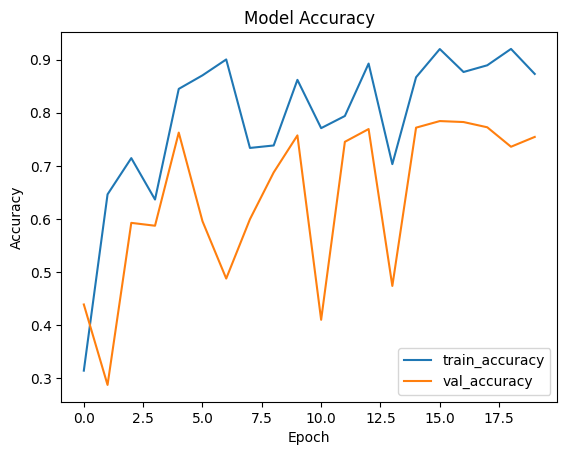

In [7]:
plt.plot(resnet_model.history['accuracy'])
plt.plot(resnet_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy','val_accuracy'], loc = 'lower right')
plt.show()